In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.shape

(202, 26)

In [4]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
print(df.dtypes)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


In [6]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [7]:
df.shape

(202, 26)

# <font color='green'>Imputing Null values on 'num-of-doors column': First we will work on 'num-of-doors' column, where only two NAN values are present. My approach is to compare that two rows with the other similar rows</font>

In [9]:
##This will show which two rows where 2 NAN values of 'num-of-doors' are present
df[df['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
26,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
60,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [10]:
## This will give output where car vendor is mazda and body style is sedan as we have one nan value of mazda vendor
a1=df[(df['make'] == 'mazda') & (df['body-style'] == 'sedan')]
a1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
50,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
51,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
57,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8495
59,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10245
60,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795
62,0,118.0,mazda,gas,std,four,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120,5000,19,27,18280
63,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344


In [11]:
## We can see that almost all mazda cars but sedan look have almost same length, width, height and all of the mazda(sedan) cars have four doors
print(a1['length'])
print(a1['width'])
print(a1['wheel-base'])
print(a1['height'])

50    166.8
51    166.8
57    177.8
59    177.8
60    177.8
62    175.0
63    175.0
Name: length, dtype: float64
50    64.2
51    64.2
57    66.5
59    66.5
60    66.5
62    66.1
63    66.1
Name: width, dtype: float64
50     93.1
51     93.1
57     98.8
59     98.8
60     98.8
62    104.9
63    104.9
Name: wheel-base, dtype: float64
50    54.1
51    54.1
57    55.5
59    55.5
60    55.5
62    54.4
63    54.4
Name: height, dtype: float64


In [12]:
## This will give output where car vendor is dodge and body style is sedan as we have one nan value of dodge vendor
a=df[(df['make'] == 'dodge') & (df['body-style'] == 'sedan')]
a

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
24,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692
25,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609
26,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558


In [13]:
## We can see that almost all dodge cars but sedan look have same length, width, height and all of the dodge(sedan) cars have four doors
print(a['length'])
print(a['width'])
print(a['wheel-base'])
print(a['height'])

24    157.3
25    157.3
26    157.3
Name: length, dtype: float64
24    63.8
25    63.8
26    63.8
Name: width, dtype: float64
24    93.7
25    93.7
26    93.7
Name: wheel-base, dtype: float64
24    50.6
25    50.6
26    50.6
Name: height, dtype: float64


In [14]:
## So missing indexes have been imputed based on their similar object door numbers

df.loc[26, "num-of-doors"] = 'four'  # Replaces NaN at index 26
df.loc[60, "num-of-doors"] = 'four'  # Replaces NaN at index 60

In [15]:
## So missing values of num of doors column have been successfully imputed
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [16]:
df_s1=df.copy()
df_s2=df.copy()
df_s3=df.copy()
df_s4=df.copy()
df_s5=df.copy()

In [17]:
## Duplicated vales have been removed

df_s1[df_s1.duplicated()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [18]:
df_s1.shape

(202, 26)

In [19]:
df_s1.drop_duplicates(inplace=True)

In [20]:
df_s1.shape

(201, 26)

# <font color= 'blue'> Replacing all ? value with np.nan </font>

In [22]:
df_s1.replace('?', np.nan, inplace=True)

In [23]:
df_s1.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [24]:
df_s1['num-of-doors'].value_counts()

num-of-doors
four    115
two      86
Name: count, dtype: int64

# <font color= 'red'> Converting num-of-doors column into Int </font>

In [26]:
obj_to_int1 = {
    "two": 2,
    "four": 4,
}

df_s1['num-of-doors'] = df_s1['num-of-doors'].map(obj_to_int1)

In [27]:
df_s1['num-of-cylinders'].value_counts()

num-of-cylinders
four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: count, dtype: int64

# <font color= 'Green'> Converting num-of-cylinders column into Int </font>

In [29]:
obj_to_int2 = {
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "eight": 8,
    "twelve": 12
}
df_s1['num-of-cylinders'] = df_s1['num-of-cylinders'].map(obj_to_int2)

In [30]:
df['fuel-system'].value_counts()

fuel-system
mpfi    93
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [31]:
df_s1.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

# <font color='red'>Imputing Null values on 'bore' and 'stroke': First we will work on 'bore' and 'stroke' column, where only 4  NAN values are present. My approach is to compare that two rows with the other similar rows</font>

In [33]:
df_s1[df_s1['bore'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
52,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
53,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
54,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
55,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645


In [34]:
## As we are seeing, there's no matching row for NAN of 'bore' and 'stroke' columns...NAN values fuel-system, mileage and drive-wheels are different...
##So we need to drop those rows and we can check its distrbution before and aftyer droping

df_s1[(df_s1['make'] == 'mazda') & (df_s1['aspiration'] == 'std') & (df_s1['num-of-doors'] == 2)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
47,1,104.0,mazda,gas,std,2,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
48,1,104.0,mazda,gas,std,2,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095
49,1,104.0,mazda,gas,std,2,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
52,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
53,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
54,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
55,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645
56,1,129.0,mazda,gas,std,2,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845
58,1,129.0,mazda,gas,std,2,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10595


In [35]:
df_s2=df_s1.copy()

# <font color= 'Green'> Dropping NAN values of Bore and Stroke columns </font>

In [37]:
df_s1 = df_s1.dropna(subset=['bore', 'stroke'])

# <font color= 'red'> Checking Bore Column distribution before dropping after dropping NAN values </font>

<Axes: >

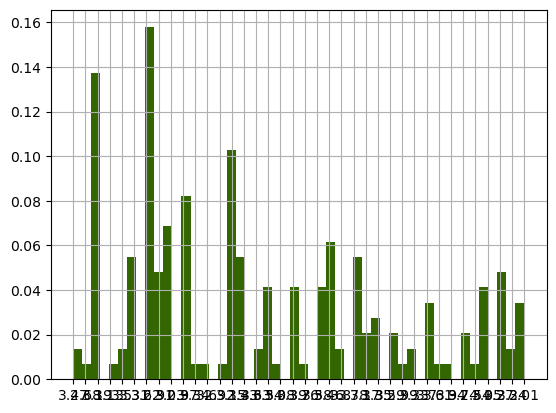

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df_s2['bore'].hist(bins=50, ax=ax, density=True, color='red')
# After drop data
df_s1['bore'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)


### As we can not see red that means distribution for bore column is same after dropping and before dropping

# <font color= 'green'> Checking stroke Column distribution before dropping after dropping NAN values </font>

<Axes: >

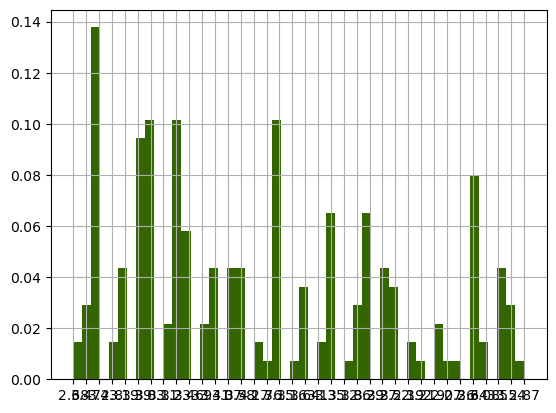

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df_s2['stroke'].hist(bins=50, ax=ax, density=True, color='red')
# After drop data
df_s1['stroke'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)


### As we can not see red that means distribution for stroke column is same after dropping and before dropping

# Imp Note
# df is initial dataframe
# df_s2-------replaced ? with nan
# df_s1-------------dropped NAN value of bore and strike

# <font color= 'red'>  After dropping four rows it becomes 197 from 201 </font>

In [44]:
df_s1.shape

(197, 26)

## *So we will work with df_s1 now*

In [46]:
df_s1.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

# <font color='green'>Imputing Null values on 'horsepower' and 'peak-rpm': First we will work on 'horsepower' and 'peak-rpm' column, where only 2  NAN values are present. My approach is to compare that two rows with the other similar rows</font>

In [48]:
df_s1[df_s1['horsepower'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
126,0,NaN,renault,gas,std,4,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
127,2,NaN,renault,gas,std,2,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


In [49]:
df_s1[(df_s1['make'] == 'renault')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
126,0,NaN,renault,gas,std,4,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
127,2,NaN,renault,gas,std,2,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


## how much % data is missing in each column...normally 5% may be the threshold to delete or drop the NAN values 

In [51]:
df_s1.isnull().mean()*100

symboling             0.000000
normalized-losses    18.781726
make                  0.000000
fuel-type             0.000000
aspiration            0.000000
num-of-doors          0.000000
body-style            0.000000
drive-wheels          0.000000
engine-location       0.000000
wheel-base            0.000000
length                0.000000
width                 0.000000
height                0.000000
curb-weight           0.000000
engine-type           0.000000
num-of-cylinders      0.000000
engine-size           0.000000
fuel-system           0.000000
bore                  0.000000
stroke                0.000000
compression-ratio     0.000000
horsepower            1.015228
peak-rpm              1.015228
city-mpg              0.000000
highway-mpg           0.000000
price                 0.000000
dtype: float64

# As we are seeing there are 2 samples for renault brand and both of those samples contains NAN value for 3 features...So if we drop these two samples, there will be no more rows of renault brand...now checking or finding similar rows comparing to 126 and 127 index so that we can impute those indexes by similar rows mean value..so first we will impute for 126 and 127 no index

# <font color='red'>So now we will impute vales to horsepower and peak-rpm features</font>

In [54]:
##Finding similar rows for 126 no index
df_s1[(df_s1['body-style'] == 'wagon') & (df_s1['aspiration'] == 'std')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
7,1,NaN,audi,gas,std,4,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
27,-1,110.0,dodge,gas,std,4,wagon,fwd,front,103.3,...,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921
35,0,78.0,honda,gas,std,4,wagon,fwd,front,96.5,...,92,1bbl,2.92,3.41,9.2,76,6000,30,34,7295
90,1,103.0,nissan,gas,std,4,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7349
94,1,103.0,nissan,gas,std,4,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999
99,0,108.0,nissan,gas,std,4,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
106,0,NaN,peugot,gas,std,4,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440
110,0,NaN,peugot,gas,std,4,wagon,rwd,front,114.2,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695
120,-1,74.0,plymouth,gas,std,4,wagon,fwd,front,103.3,...,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921
126,0,NaN,renault,gas,std,4,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295


In [55]:
## exclude NaN values from the 'horsepower' column
a= df_s1[(df_s1['body-style'] == 'wagon') & (df_s1['aspiration'] == 'std') & (df_s1['horsepower'].notna())]

# we have keep similar rows into 'a' dataframe and impute missing values of horsepower and peak-rpm by 'a''s mean

In [57]:
## Converting similar rows horsepower and rpm columns into integer
a['horsepower']=a['horsepower'].astype(int)
a['peak-rpm']=a['peak-rpm'].astype(int)

C:\Users\Zashid\AppData\Local\Temp\ipykernel_9908\3768246436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['horsepower']=a['horsepower'].astype(int)
C:\Users\Zashid\AppData\Local\Temp\ipykernel_9908\3768246436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['peak-rpm']=a['peak-rpm'].astype(int)


In [58]:
a.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors           int64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [59]:
##Now imputing main dataframe horsepower and peak rpm columns by mean of its similar rows
df_s1['horsepower'] = df_s1['horsepower'].fillna(a['horsepower'].mean())
df_s1['peak-rpm'] = df_s1['peak-rpm'].fillna(a['peak-rpm'].mean())

# now converting horse power and rpm columns into integer in main dataframe

In [61]:
df_s1['horsepower'] = df_s1['horsepower'].astype(int)
df_s1['peak-rpm'] = df_s1['peak-rpm'].astype(int)

df_s1.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors           int64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [62]:
df_s1.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [63]:
df_s1.shape

(197, 26)

# <font color= 'green'> Checking horsepower and peak-rpm Column distribution before imputing by mean and after dropping by similar row's mean </font>

In [65]:
df_s2 = df_s2.dropna(subset=['horsepower', 'peak-rpm'])
df_s2['horsepower'] = df_s2['horsepower'].astype(int)
df_s2['peak-rpm'] = df_s2['peak-rpm'].astype(int)
df_s2.shape

(199, 26)

# As we can see red that means distribution for horsepower and peak rpm column when NAN values are removed completely from horsepower. but no significant changes in distribution

<Axes: >

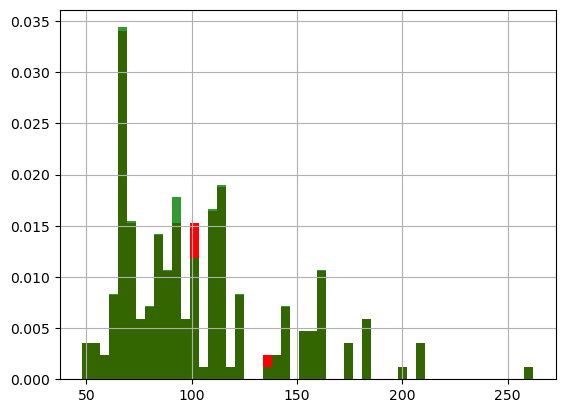

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df_s2['horsepower'].hist(bins=50, ax=ax, density=True, color='red')
# After drop data
df_s1['horsepower'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)


<Axes: >

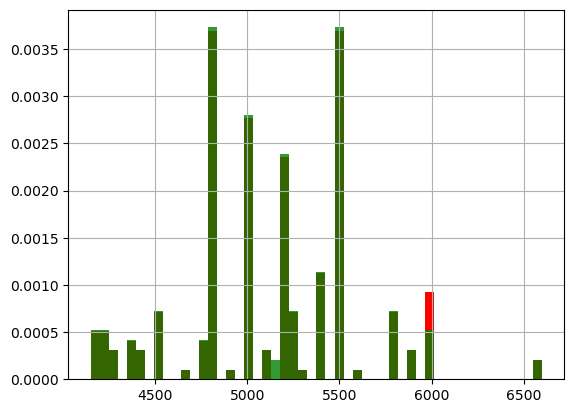

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df_s2['peak-rpm'].hist(bins=50, ax=ax, density=True, color='red')
# After drop data
df_s1['peak-rpm'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

# # Imp Note----2
# df is initial dataframe
# df_s2-------replaced ? with nan, removed nan values from horsepower and peak rpm
# df_s1-------------dropped NAN value of bore and strike, replaced NAN values from horsepower and peak rpm features with its similar row's mean
# df_s3 is a copy of df_s1

# <font color = 'red'> Create new column 'dimension' as the product of length, width, and height</font>

In [71]:
df_s1['dimension'] = df_s1['length'] * df_s1['width'] * df_s1['height']

In [72]:
df_s1.shape

(197, 27)

In [73]:
df_s3=df_s1.copy()

## Dropping normalized losses column


In [75]:
df_s1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,dimension
0,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,528019.904
1,3,NaN,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,528019.904
2,1,NaN,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,587592.640
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.0,102,5500,24,30,13950,634816.956
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.0,115,5500,18,22,17450,636734.832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,721961.760
197,-1,95.0,volvo,gas,turbo,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,720913.920
198,-1,95.0,volvo,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,721961.760
199,-1,95.0,volvo,diesel,turbo,4,sedan,rwd,front,109.1,...,idi,3.01,3.4,23.0,106,4800,26,27,22470,721961.760


In [76]:
df_s1.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors           int64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-mpg               int64
highway-mpg            int64
price                  int64
dimension            float64
dtype: object

In [77]:
## Dropping normalized-losses, length, width and height columns
df_s1=df_s1.drop(columns=['normalized-losses','length','width','height'])

In [78]:
df_s1['average-mpg'] = (df_s1['city-mpg'] + df_s1['highway-mpg']) / 2
df_s1 = df_s1.drop(columns=['city-mpg', 'highway-mpg'])


In [79]:
df_s1.shape

(197, 22)

In [80]:
df_s1.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors           int64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower             int32
peak-rpm               int32
price                  int64
dimension            float64
average-mpg          float64
dtype: object

# Creating New column Displacement using bore, strike and number of cylinder

In [82]:
df_s1['bore'] = df_s1['bore'].astype(float)
df_s1['stroke'] = df_s1['stroke'].astype(float)

# Calculate displacement in cubic centimeters (cc)
df_s1['displacement'] = (np.pi / 4) * (df_s1['bore'] ** 2) * df_s1['stroke'] * df_s1['num-of-cylinders']
df_s1 = df_s1.drop(columns=['bore', 'stroke', 'num-of-cylinders'])

In [83]:
df_s1.shape

(197, 20)

In [84]:
df_s1.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
       'curb-weight', 'engine-type', 'engine-size', 'fuel-system',
       'compression-ratio', 'horsepower', 'peak-rpm', 'price', 'dimension',
       'average-mpg', 'displacement'],
      dtype='object')

In [85]:
df_s1.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors           int64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
curb-weight            int64
engine-type           object
engine-size            int64
fuel-system           object
compression-ratio    float64
horsepower             int32
peak-rpm               int32
price                  int64
dimension            float64
average-mpg          float64
displacement         float64
dtype: object

# Creating New column torque using rpm and horsepower column

In [87]:
df_s1['torque'] = (df_s1['horsepower'] * 5252) / df_s1['peak-rpm']
df_s1.drop(columns=['horsepower', 'peak-rpm'], inplace=True)


In [88]:
df_s1.shape

(197, 19)

In [89]:
df_s1.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
       'curb-weight', 'engine-type', 'engine-size', 'fuel-system',
       'compression-ratio', 'price', 'dimension', 'average-mpg',
       'displacement', 'torque'],
      dtype='object')

In [90]:
df_s1.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors           int64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
curb-weight            int64
engine-type           object
engine-size            int64
fuel-system           object
compression-ratio    float64
price                  int64
dimension            float64
average-mpg          float64
displacement         float64
torque               float64
dtype: object

# Checking Correlation and heatmap

In [92]:
df_s1_numeric = df_s1.select_dtypes(include=['number'])
correlation_matrix = df_s1_numeric.corr()
correlation_matrix
correlation_matrix.style.highlight_min(axis=0)

,symboling,num-of-doors,wheel-base,curb-weight,engine-size,compression-ratio,price,dimension,average-mpg,displacement,torque
symboling,1.000000,-0.660873,-0.533883,-0.230590,-0.067874,-0.181118,-0.084190,-0.451358,0.046601,-0.096308,0.001227
num-of-doors,-0.660873,1.000000,0.439150,0.204928,-0.006928,0.167016,0.042484,0.459599,-0.068057,0.011719,-0.050982
wheel-base,-0.533883,0.439150,1.000000,0.782166,0.568617,0.249006,0.586661,0.914675,-0.536121,0.553122,0.484694
curb-weight,-0.230590,0.204928,0.782166,1.000000,0.857374,0.155542,0.835073,0.823201,-0.798308,0.824007,0.836308
engine-size,-0.067874,-0.006928,0.568617,0.857374,1.000000,0.024231,0.887508,0.584330,-0.726793,0.981139,0.906398
compression-ratio,-0.181118,0.167016,0.249006,0.155542,0.024231,1.000000,0.071079,0.232967,0.301116,0.032371,-0.104779
price,-0.084190,0.042484,0.586661,0.835073,0.887508,0.071079,1.000000,0.633471,-0.712660,0.858699,0.839387
dimension,-0.451358,0.459599,0.914675,0.823201,0.584330,0.232967,0.633471,1.000000,-0.609280,0.561635,0.532961
average-mpg,0.046601,-0.068057,-0.536121,-0.798308,-0.726793,0.301116,-0.712660,-0.609280,1.000000,-0.692960,-0.819398
displacement,-0.096308,0.011719,0.553122,0.824007,0.981139,0.032371,0.858699,0.561635,-0.692960,1.000000,0.880223


<Axes: >

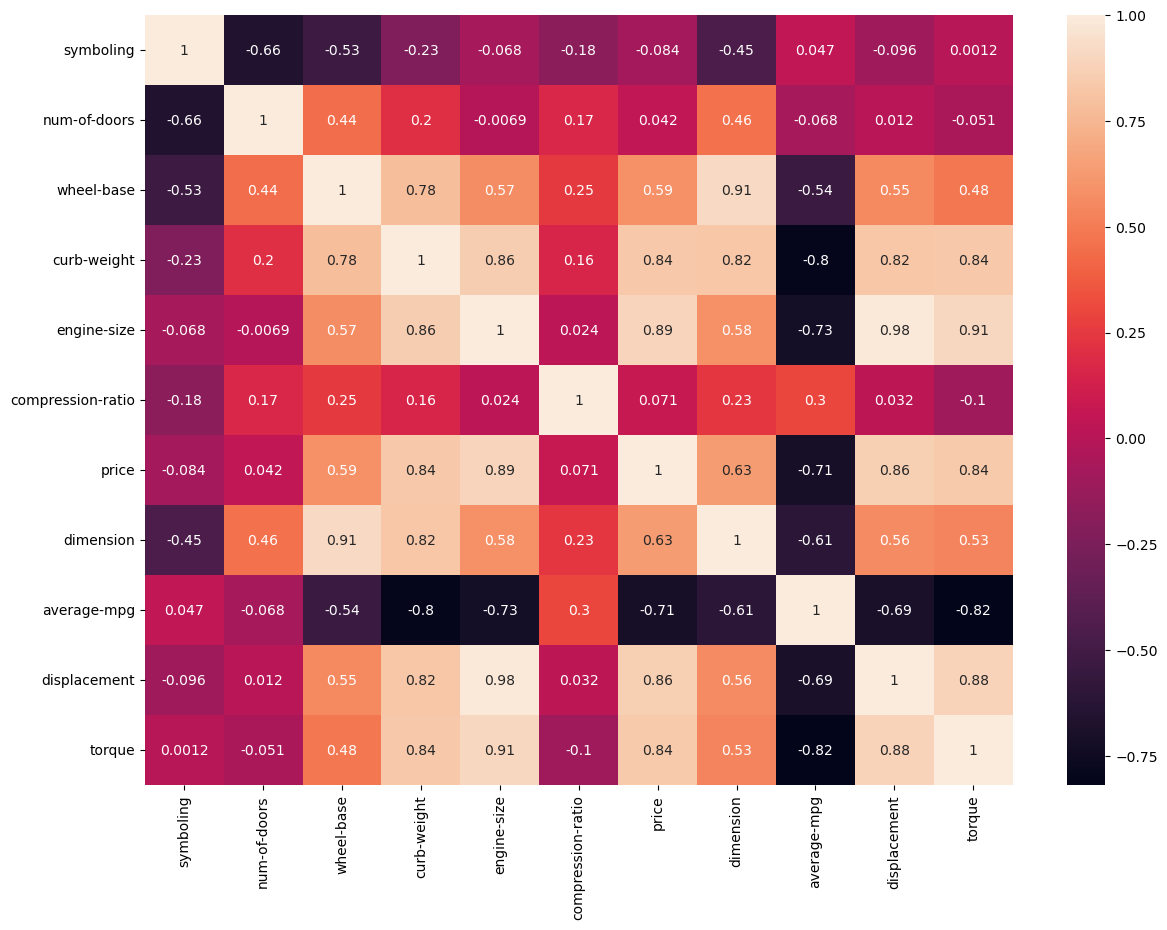

In [93]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_s1_numeric.corr(),annot=True)

# <font color='red'> Observation-01: we are seeing that symboling, num-of-doors, compression ratio are less correlated with price...so we can drop those columns or features</font>

# <font color='red'> Observation-02: we are seeing that wheel-base is highly correlated with dimension but price is more correlated with dimension, so we are dropping wheel-base, displacement is highly(0.98) with engine size  so we are dropping displacement, and curb weight has high correlation with engin size but both have significant coorelaton with price......so we are dropping curb-weight </font>

In [96]:
df_s1.drop(columns=['wheel-base','displacement','curb-weight'],inplace=True)

In [97]:
df_s1.shape

(197, 16)

In [98]:
df_s1.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'engine-size', 'fuel-system', 'compression-ratio', 'price', 'dimension',
       'average-mpg', 'torque'],
      dtype='object')

In [99]:
df_s1.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors           int64
body-style            object
drive-wheels          object
engine-location       object
engine-type           object
engine-size            int64
fuel-system           object
compression-ratio    float64
price                  int64
dimension            float64
average-mpg          float64
torque               float64
dtype: object

In [100]:
df_s1['make'].value_counts()

make
toyota           32
nissan           18
mitsubishi       13
mazda            13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64

In [101]:
df_s1['fuel-type'].value_counts()

fuel-type
gas       177
diesel     20
Name: count, dtype: int64

In [102]:
df_s1.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'engine-size', 'fuel-system', 'compression-ratio', 'price', 'dimension',
       'average-mpg', 'torque'],
      dtype='object')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse_output=False, drop='first'), [
        'make', 'fuel-type', 'aspiration', 'body-style', 
        'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'
    ]),
    ('tnf2', StandardScaler(), [
        'symboling', 'num-of-doors', 'engine-size', 'compression-ratio', 
        'price', 'dimension', 'average-mpg', 'torque'
    ])
], remainder='drop')


df_s1.columns

# <font color = 'red'> Code if we want to back to dataframe after transformation </font>

# Fit and transform your DataFrame
transformed_array = transformer.fit_transform(df_s1)

# Get feature names from OneHotEncoder
ohe_feature_names = transformer.named_transformers_['tnf1'].get_feature_names_out([
    'make', 'fuel-type', 'aspiration', 'body-style', 
    'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'
])

# Combine with numeric column names (from scaler)
scaled_numeric_names = [
    'symboling', 'num-of-doors', 'engine-size', 'compression-ratio', 
    'price', 'dimension', 'average-mpg', 'torque'
]

# 4. Combine both into a full list of new column names
final_columns = list(ohe_feature_names) + scaled_numeric_names

# 5. Convert the transformed array to a DataFrame
transformed_df = pd.DataFrame(transformed_array, columns=final_columns)

# Optional: check result
print(transformed_df.head())


# TASKS

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price (y=price) of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing `linear regression` and `KNN` algorithm.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

In [109]:
df_s1

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,engine-size,fuel-system,compression-ratio,price,dimension,average-mpg,torque
0,3,alfa-romero,gas,std,2,convertible,rwd,front,dohc,130,mpfi,9.0,13495,528019.904,24.0,116.594400
1,3,alfa-romero,gas,std,2,convertible,rwd,front,dohc,130,mpfi,9.0,16500,528019.904,24.0,116.594400
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,152,mpfi,9.0,16500,587592.640,22.5,161.761600
3,2,audi,gas,std,4,sedan,fwd,front,ohc,109,mpfi,10.0,13950,634816.956,27.0,97.400727
4,2,audi,gas,std,4,sedan,4wd,front,ohc,136,mpfi,8.0,17450,636734.832,20.0,109.814545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,volvo,gas,std,4,sedan,rwd,front,ohc,141,mpfi,9.5,16845,721961.760,25.5,110.875556
197,-1,volvo,gas,turbo,4,sedan,rwd,front,ohc,141,mpfi,8.7,19045,720913.920,22.0,158.550943
198,-1,volvo,gas,std,4,sedan,rwd,front,ohcv,173,mpfi,8.8,21485,721961.760,20.5,127.957818
199,-1,volvo,diesel,turbo,4,sedan,rwd,front,ohc,145,idi,23.0,22470,721961.760,26.5,115.981667


# <font color= 'orange'> Linear Regression </font>

In [111]:
# Remove and store the price column
price_column = df_s1.pop('price')
df_s1['price'] = price_column
df_s1


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,engine-size,fuel-system,compression-ratio,dimension,average-mpg,torque,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,dohc,130,mpfi,9.0,528019.904,24.0,116.594400,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,dohc,130,mpfi,9.0,528019.904,24.0,116.594400,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,152,mpfi,9.0,587592.640,22.5,161.761600,16500
3,2,audi,gas,std,4,sedan,fwd,front,ohc,109,mpfi,10.0,634816.956,27.0,97.400727,13950
4,2,audi,gas,std,4,sedan,4wd,front,ohc,136,mpfi,8.0,636734.832,20.0,109.814545,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,volvo,gas,std,4,sedan,rwd,front,ohc,141,mpfi,9.5,721961.760,25.5,110.875556,16845
197,-1,volvo,gas,turbo,4,sedan,rwd,front,ohc,141,mpfi,8.7,720913.920,22.0,158.550943,19045
198,-1,volvo,gas,std,4,sedan,rwd,front,ohcv,173,mpfi,8.8,721961.760,20.5,127.957818,21485
199,-1,volvo,diesel,turbo,4,sedan,rwd,front,ohc,145,idi,23.0,721961.760,26.5,115.981667,22470


In [112]:
df_s1['torque']

0      116.594400
1      116.594400
2      161.761600
3       97.400727
4      109.814545
          ...    
196    110.875556
197    158.550943
198    127.957818
199    115.981667
200    110.875556
Name: torque, Length: 197, dtype: float64

In [113]:
x=df_s1.iloc[:,0:15]
y=df_s1.iloc[:,-1]

In [114]:
x

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,engine-size,fuel-system,compression-ratio,dimension,average-mpg,torque
0,3,alfa-romero,gas,std,2,convertible,rwd,front,dohc,130,mpfi,9.0,528019.904,24.0,116.594400
1,3,alfa-romero,gas,std,2,convertible,rwd,front,dohc,130,mpfi,9.0,528019.904,24.0,116.594400
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,152,mpfi,9.0,587592.640,22.5,161.761600
3,2,audi,gas,std,4,sedan,fwd,front,ohc,109,mpfi,10.0,634816.956,27.0,97.400727
4,2,audi,gas,std,4,sedan,4wd,front,ohc,136,mpfi,8.0,636734.832,20.0,109.814545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,volvo,gas,std,4,sedan,rwd,front,ohc,141,mpfi,9.5,721961.760,25.5,110.875556
197,-1,volvo,gas,turbo,4,sedan,rwd,front,ohc,141,mpfi,8.7,720913.920,22.0,158.550943
198,-1,volvo,gas,std,4,sedan,rwd,front,ohcv,173,mpfi,8.8,721961.760,20.5,127.957818
199,-1,volvo,diesel,turbo,4,sedan,rwd,front,ohc,145,idi,23.0,721961.760,26.5,115.981667


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

# <font color= 'orange'> ColumnTransformer and Linear Regression</font>

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse_output=False, drop='first'), [
        'make', 'fuel-type', 'aspiration', 'body-style', 
        'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'
    ]),
    ('tnf2', StandardScaler(), [
        'symboling', 'num-of-doors', 'engine-size', 'compression-ratio','dimension', 'average-mpg', 'torque'])
], remainder='passthrough')



In [118]:
transformed_X_train=transformer.fit_transform(X_train)
transformed_X_test=transformer.transform(X_test)

transformed_X_train

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         9.30664568e-01, -5.14641648e-01,  6.82930454e-02],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.99113869e-03, -9.38355023e-01, -6.14101868e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.50080688e-01, -9.09282719e-02, -3.88262332e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.17312687e-01, -1.02309770e+00, -6.14101868e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.69380014e-02,  2.36660931e+00, -1.30980380e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.43221991e-01, -9.09282719e-02, -3.50879981e-01]])

In [119]:
lr_regression=LinearRegression()
lr_regression.fit(transformed_X_train,y_train)

LinearRegression()

In [120]:
y_lr_regress_predict=lr_regression.predict(transformed_X_test)

In [121]:
lr_mse_regression=mean_squared_error(y_test,y_lr_regress_predict)
print(f'Mean_Squared_Error in LR for the given regression problem is: {lr_mse_regression}')

Mean_Squared_Error in LR for the given regression problem is: 6794269.852745786


In [122]:
r2_score_LR_regression=r2_score(y_test,y_lr_regress_predict)
print(f'R2_Score in LR for the given regression problem is: {r2_score_LR_regression}')

R2_Score in LR for the given regression problem is: 0.8999275760600902


# KNN

In [124]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=2)

In [125]:
knn_reg.fit(transformed_X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [126]:
y_knn_reg_predict=knn_reg.predict(transformed_X_test)

In [127]:
knn_mse_reg=mean_squared_error(y_test,y_knn_reg_predict)
print(f'Mean_Squared_Error in KNN for the given regression is: {knn_mse_reg}')

Mean_Squared_Error in KNN for the given regression is: 11375428.333333334


In [128]:
r2_score_knn_regress=r2_score(y_test,y_knn_reg_predict)
print(f'R2_Score in KNN for the given regression problem is: {r2_score_knn_regress}')

R2_Score in KNN for the given regression problem is: 0.83245194681054
